In [82]:
import pandas as pd
import os
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [83]:
test_da=pd.read_csv("train_loan.csv")
test_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [84]:
test_da.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
plot(arange(5))

NameError: name 'plot' is not defined

In [85]:
test_da.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [86]:
test_da['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

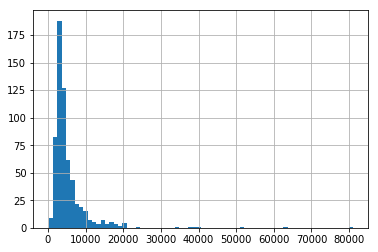

In [87]:
test_da['ApplicantIncome'].hist(bins=70)

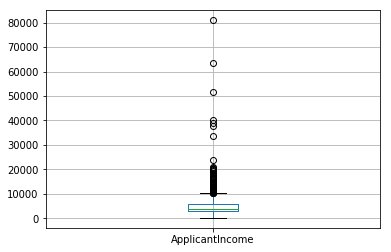

In [88]:
test_da.boxplot(column='ApplicantIncome')

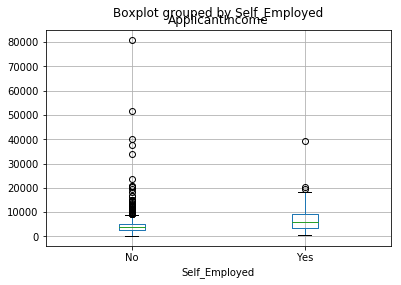

In [89]:
test_da.boxplot(column='ApplicantIncome', by='Self_Employed')

In [90]:
test_da['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

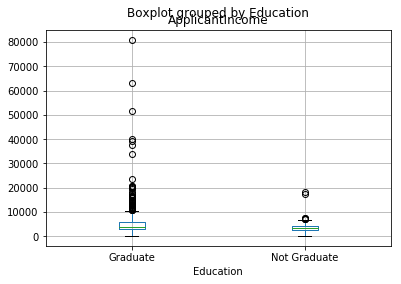

In [91]:
test_da.boxplot(column='ApplicantIncome', by='Education')

In [92]:
test_da['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

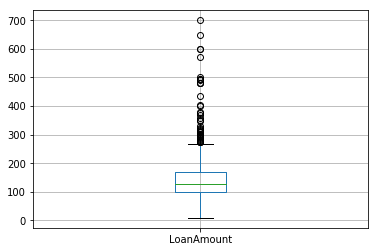

In [93]:
test_da.boxplot(column='LoanAmount')

In [94]:
temp1 = test_da['Credit_History'].value_counts()

In [95]:
temp1

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [96]:
test_da.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [97]:
import seaborn as sns

In [98]:
import matplotlib.pyplot as plt

In [99]:
temp2=test_da.pivot_table(values='Loan_Status', index=['Credit_History'],aggfunc = lambda x:x.map({'Y':1,'N':0}).mean())
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


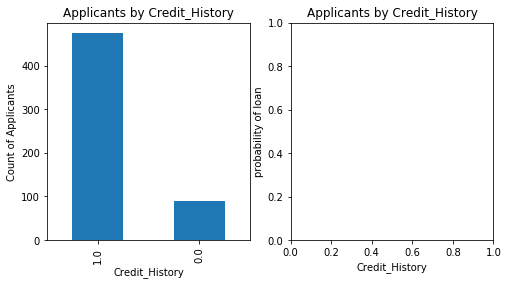

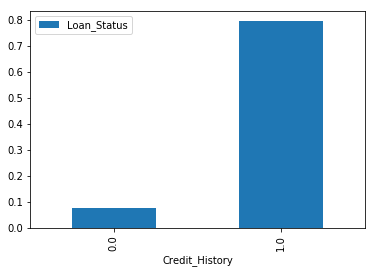

In [100]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')


ax2=fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('probability of loan')
ax2.set_title("Applicants by Credit_History")
temp2.plot(kind='bar')

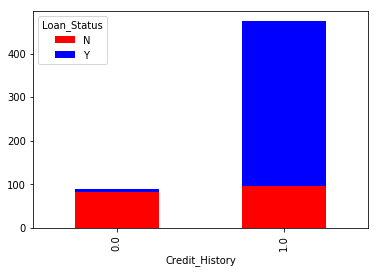

In [101]:
temp3 = pd.crosstab(test_da['Credit_History'], test_da['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [102]:
test_da.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [103]:
test_da['Self_Employed'].fillna('No',inplace=True)
table = test_da.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

test_da['LoanAmount'].fillna(test_da[test_da['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [104]:
test_da.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

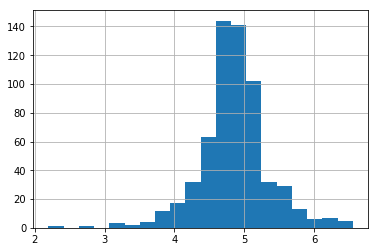

In [105]:
test_da['LoanAmount_log'] = np.log(test_da['LoanAmount'])
test_da['LoanAmount_log'].hist(bins=20)

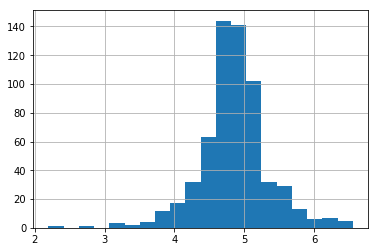

In [106]:
test_da['TotalIncome'] = test_da['ApplicantIncome'] + test_da['CoapplicantIncome']
test_da['TotalIncome_log'] = np.log(test_da['TotalIncome'])
test_da['LoanAmount_log'].hist(bins=20)

In [107]:
test_da.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [108]:
from sklearn.impute import SimpleImputer

In [109]:
test_da['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [110]:
test_da.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,4.867534,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [111]:
temp3=test_da.pivot_table(values='Credit_History',index=['Gender'], aggfunc=np.sum)
temp3

,Credit_History
Gender,
Female,84.0
Male,382.0


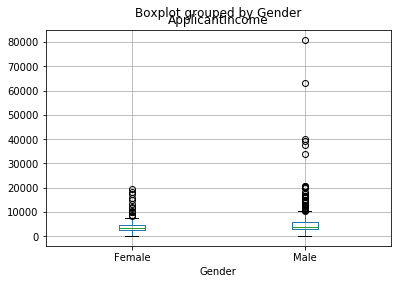

In [112]:
test_da.boxplot(column='ApplicantIncome', by='Gender')

In [120]:
test_da.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [114]:
test_da['Gender'].fillna('M',inplace=True)

In [115]:
test_da['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [116]:
test_da['Married'].fillna('Yes',inplace=True)

In [121]:
test_da.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [62]:
test_da['Loan_Amount_Term'].describe()

count    614.000000
mean     342.000000
std       64.372489
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [118]:
test_da['Loan_Amount_Term'].fillna(test_da['Loan_Amount_Term'].mean(),inplace=True)

In [65]:
test_da['Dependents'].describe()

count    614.000000
mean       1.719870
std        1.039056
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Dependents, dtype: float64

In [66]:
test_da['Dependents'].value_counts()

1    345
2    102
3    101
4     51
0     15
Name: Dependents, dtype: int64

In [122]:
test_da['Dependents'].fillna(0,inplace=True)

test_da['Credit_History'].fillna(0,inplace=True)
test_da.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [123]:
from sklearn.preprocessing import LabelEncoder
object_cols=list(test_da.select_dtypes(include='object').columns)
object_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [124]:
label_encoder=LabelEncoder()
for col in object_cols:
    test_da[col]=label_encoder.fit_transform(test_da[col])

In [129]:
#from sklearn.tree import DecisiontreeRegressor
#from sklearn.matrices import mean_absolute_error

X=list(test_da.columns)
X

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'LoanAmount_log',
 'TotalIncome',
 'TotalIncome_log']

In [130]:
X.remove('Loan_Status')


In [131]:
X

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'LoanAmount_log',
 'TotalIncome',
 'TotalIncome_log']

In [148]:
test_X=test_da['Credit_History']
test_X.head(10)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    0.0
8    1.0
9    1.0
Name: Credit_History, dtype: float64

In [149]:
test_y=test_da['Loan_Status']
test_y.head(10)

0    1
1    0
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    0
Name: Loan_Status, dtype: int64

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))


In [156]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model,test_da,predictor_var,outcome_var)

Accuracy : 77.036%


In [139]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(test_X,test_y,train_size=0.8,test_size=0.2,random_state=0)

In [ ]:
model.fit(X_train)